Rabi Frequency (kHz):  60.62511
Amplitude:  0.998
Pi-Time (us):  8.24741
[[9.90760478e+04 1.29486611e-01]
 [1.29486611e-01 2.68455276e-05]]
314.7634790972441


c:\python27\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


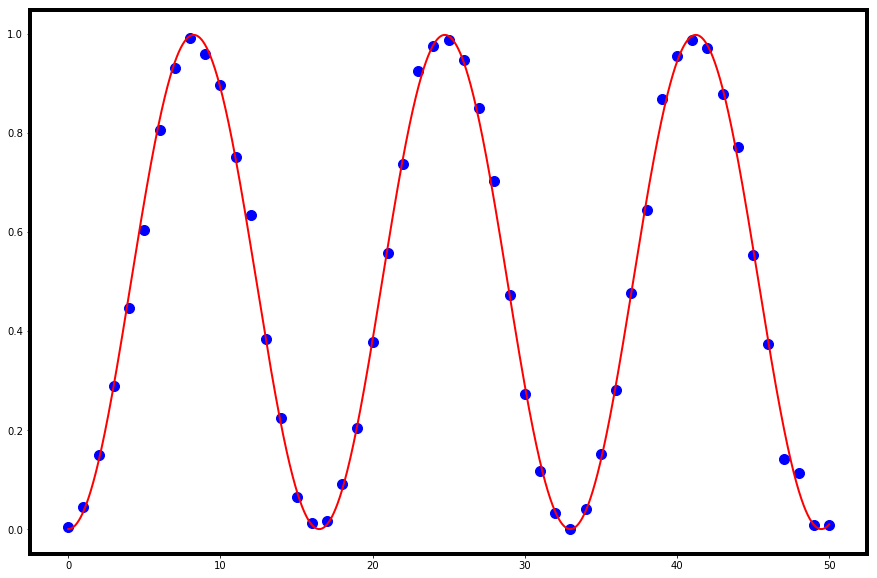

In [2]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def rabi(x, omega, A):
    return A*np.sin(omega*x/2)**2

#data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_02.dir/00084 - Rabi_prob.csv', delimiter = ',')
data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/12.dir/2020_12_07.dir/00063 - Rabi_prob.csv', delimiter = ',')
#data = np.loadtxt('H:/Data/2019.dir/07.dir/2019_07_12.dir/00217 - Rabi_prob.csv', delimiter = ',')


t = data[:,0]*1e-6
prob = data[:,1]

#t = np.append(t, data1[:,0]*1e-6)
#prob = np.append(prob, data1[:,1])

#t = np.concatenate((data[:,0], data1[:,0]), axis = 0)*1e-6
#prob = np.concatenate((data[:,1], data1[:,1]), axis = 0)

rabi_fit, rabi_err = curve_fit(rabi,t, prob, p0 = [2*np.pi*60.0e3,1])
print 'Rabi Frequency (kHz): ', '{:.5f}'.format(rabi_fit[0]/2/np.pi/1e3)
print 'Amplitude: ', '{:.3f}'.format(rabi_fit[1])
print 'Pi-Time (us): ', '{:.5f}'.format(np.pi/rabi_fit[0]*1e6)

print rabi_err
print np.sqrt(rabi_err[0,0])


x_fit = np.linspace(0,t[-1],5e3)
y_fit = rabi(x_fit, rabi_fit[0], rabi_fit[1])

#xlim([1990,2500])
plot(t*1e6,prob,'o',color = 'b', markersize = 10)
plot(x_fit*1e6, y_fit, color = 'r', linewidth = 2)
show()